# 1.)Check eligibility of the Customer given the inputs described above.(Classification)


# Read Data

In [1]:
import pandas as pd
A=pd.read_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Loan_project/training_set.csv")
B=pd.read_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Loan_project/testing_set.csv")


In [2]:
A

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


# Missing Data Treatment

In [3]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
B.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [5]:
from Wd8pm import replacer
replacer(A)
replacer(B)

In [6]:
A.isna().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
B.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Unique values

In [8]:
A.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [9]:
B.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           145
Loan_Amount_Term      13
Credit_History         3
Property_Area          3
dtype: int64

# Outliers removal

# Bivariate Analysis

In [10]:
Y= A["Loan_Status"]
X=A.drop(labels=["Loan_Status","Loan_ID"],axis=1)
Xb=B.drop(labels=["Loan_ID"],axis=1)

# Anova and chisquare

# Preprocessing

In [11]:
Ximp = X
Xbimp=Xb

In [12]:

from Wd8pm import preprocessing
Xnew =preprocessing(Ximp)
Xnewb=preprocessing(Xbimp)

In [13]:
Xnew

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072651,-0.554368,0.000000,0.279851,0.451640,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.000000,-0.038610,-0.219273,0.279851,0.451640,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.394096,-0.554368,-0.957641,0.279851,0.451640,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.462412,0.252103,-0.314547,0.279851,0.451640,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.097389,-0.554368,-0.064454,0.279851,0.451640,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410479,-0.554368,-0.898095,0.279851,0.451640,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,-0.212902,-0.554368,-1.267279,-2.518655,0.451640,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,0.436842,-0.472284,1.269371,0.279851,0.451640,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,0.356730,-0.554368,0.483367,0.279851,0.451640,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [14]:
Xnewb

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.429368,0.270603,0.47918,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,-0.352692,-0.029848,-0.166482,0.270603,0.47918,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0.039641,0.098849,1.180807,0.270603,0.47918,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,-0.502774,0.418877,-0.593671,0.270603,0.00000,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,-0.311909,-0.673335,-0.955139,0.270603,0.47918,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,-0.162439,0.088982,-0.380077,0.270603,0.47918,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,-0.132056,-0.369180,-0.347216,0.270603,0.47918,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,-0.317211,0.181644,-0.166482,0.270603,0.00000,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,0.039641,0.353241,0.359289,0.270603,0.47918,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


# Splitting

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Model1  Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)

# Prediction

In [17]:
tr_pred= model.predict(xtrain)
ts_pred=model.predict(xtest)


# Accuracy

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(ytrain,tr_pred) ,accuracy_score(ytest,ts_pred)

(0.814663951120163, 0.8130081300813008)

In [19]:
from sklearn.metrics import confusion_matrix,recall_score
confusion_matrix(ytrain,tr_pred)

array([[ 67,  87],
       [  4, 333]], dtype=int64)

In [20]:
confusion_matrix(ytest,ts_pred)

array([[20, 18],
       [ 5, 80]], dtype=int64)

# Model 2 KNN classification

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)

model = knc.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
tr_acc,ts_acc

(0.8309572301425662, 0.7886178861788617)

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytrain,tr_pred)

array([[ 79,  75],
       [  8, 329]], dtype=int64)

# Gridsearch CV

In [23]:
tg = {"n_neighbors":range(2,10,1)}
knc = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(knc,tg,scoring = "accuracy",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'n_neighbors': 9}

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=9)

model = knc.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
tr_acc,ts_acc

(0.8167006109979633, 0.8048780487804879)

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytrain,tr_pred)

array([[ 68,  86],
       [  4, 333]], dtype=int64)

# Model3 Desicion Tree classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy",random_state=21)
model=dtc.fit(xtrain,ytrain)
tr_pred=dtc.predict(xtrain)
ts_pred=dtc.predict(xtest)

In [27]:
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
tr_acc,ts_acc

(1.0, 0.7235772357723578)

# Pruning

In [28]:
from sklearn.model_selection import GridSearchCV

tg = {"criterion":["entropy","gini"],"max_depth":range(2,15,1)}
dtc = DecisionTreeClassifier(random_state=21)
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [29]:
from sklearn.model_selection import GridSearchCV

tg = {"criterion":["entropy","gini"],"min_samples_leaf":range(2,15,1)}
dtc = DecisionTreeClassifier(random_state=21)
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 12}

In [30]:
from sklearn.model_selection import GridSearchCV

tg = {"criterion":["entropy","gini"],"min_samples_split":range(2,15,1)}
dtc = DecisionTreeClassifier(random_state=21)
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'criterion': 'entropy', 'min_samples_split': 12}

# Finding accuracy based on best parameters obtained for max_depth ,min_samples_split,min_samples_leaf

In [31]:
dtc = DecisionTreeClassifier(min_samples_split=13)
model1 = dtc.fit(xtrain,ytrain)
tr_pred = model1.predict(xtrain)
ts_pred = model1.predict(xtest)
from sklearn.metrics import accuracy_score
tr_err = accuracy_score(ytrain,tr_pred)
ts_err  = accuracy_score(ytest,ts_pred)
tr_err,ts_err

(0.9022403258655805, 0.6747967479674797)

In [32]:
dtc = DecisionTreeClassifier(min_samples_leaf=13)
model2 = dtc.fit(xtrain,ytrain)
tr_pred = model2.predict(xtrain)
ts_pred = model2.predict(xtest)
from sklearn.metrics import accuracy_score
tr_err = accuracy_score(ytrain,tr_pred)
ts_err  = accuracy_score(ytest,ts_pred)
tr_err,ts_err

(0.8309572301425662, 0.7723577235772358)

In [33]:
dtc = DecisionTreeClassifier(max_depth=2)
model3 = dtc.fit(xtrain,ytrain)
tr_pred = model3.predict(xtrain)
ts_pred = model3.predict(xtest)
from sklearn.metrics import accuracy_score
tr_err = accuracy_score(ytrain,tr_pred)
ts_err  = accuracy_score(ytest,ts_pred)
tr_err,ts_err

(0.814663951120163, 0.8211382113821138)

# Model 4 Random Forest 

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(random_state=21)
model = rfr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc  = accuracy_score(ytest,ts_pred)

tr_acc,ts_acc

(1.0, 0.7804878048780488)

# Model 5 Adaboost

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=21,max_depth=2)
abc = AdaBoostClassifier(dtc,n_estimators=100)

model = abc.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc  = accuracy_score(ytest,ts_pred)

tr_acc,ts_acc

(1.0, 0.6504065040650406)

In [36]:
tg = {"n_estimators":range(2,30,10)}

dtc = DecisionTreeClassifier(random_state=21,max_depth=2)
abc = AdaBoostClassifier(dtc)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(abc,tg,scoring = "accuracy",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'n_estimators': 2}

In [37]:
abc = AdaBoostClassifier(dtc,n_estimators=2)

model = abc.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc  = accuracy_score(ytest,ts_pred)
tr_acc,ts_acc

(0.814663951120163, 0.8211382113821138)

# KNN is  the best model

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=9)

model = knc.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
tr_acc,ts_acc

(0.8167006109979633, 0.8048780487804879)

In [39]:
model = knc.fit(Xnew,Y)
ts_pred=model.predict(Xnewb)

In [40]:
ts_pred

array(['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [41]:
B.shape

(367, 12)

In [42]:
B["Loan_Status"]=ts_pred

In [43]:
B.to_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Dataset/submission_loan_1.csv")

# NeuralNetworks

In [60]:
Y= A[["Loan_Status"]]
X=A.drop(labels=["Loan_Status","Loan_ID"],axis=1)
Xb=B.drop(labels=["Loan_ID"],axis=1)

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ynew = pd.DataFrame(le.fit_transform(Y.Loan_Status),columns=["Loan_Status"])

In [62]:
from Wd8pm import catcon
cat,con=catcon(X)

In [63]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X1 = pd.DataFrame(mm.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

In [64]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [83]:
nn = Sequential()
nn.add(Dense(units=100,input_dim=(len(Xnew.columns)))) # input
nn.add(Dense(100,activation="relu")) # hidden
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1,activation="sigmoid")) # output

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="mse")
model = nn.fit(Xnew,Ynew,validation_data=(Xnew,Ynew),epochs=250,callbacks=es)

Epoch 1/250
20/20 [==============================] - 1s 9ms/step - loss: 0.1940 - val_loss: 0.1882
Epoch 2/250
20/20 [==============================] - 0s 3ms/step - loss: 0.1634 - val_loss: 0.2492
Epoch 3/250
20/20 [==============================] - 0s 3ms/step - loss: 0.1578 - val_loss: 0.1604
Epoch 4/250
20/20 [==============================] - 0s 3ms/step - loss: 0.1548 - val_loss: 0.1454
Epoch 5/250
20/20 [==============================] - 0s 3ms/step - loss: 0.1476 - val_loss: 0.1430
Epoch 6/250
20/20 [==============================] - 0s 3ms/step - loss: 0.1522 - val_loss: 0.1565
Epoch 7/250
20/20 [==============================] - 0s 3ms/step - loss: 0.1535 - val_loss: 0.1400
Epoch 8/250
20/20 [==============================] - 0s 3ms/step - loss: 0.1498 - val_loss: 0.1404
Epoch 9/250
20/20 [==============================] - 0s 3ms/step - loss: 0.1527 - val_loss: 0.1429
Epoch 10/250
20/20 [==============================] - 0s 3ms/step - loss: 0.1442 - val_loss: 0.1420
Epoch 11/

In [84]:
tr = model.history['accuracy']
ts = model.history['val_accuracy']

KeyError: 'accuracy'

([<matplotlib.axis.XTick at 0x22392ace4f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

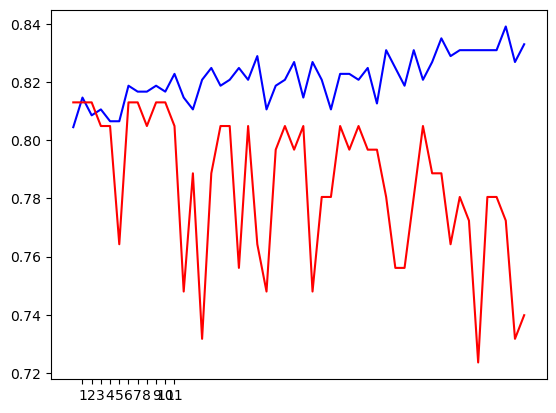

In [85]:
import matplotlib.pyplot as plt
plt.plot(tr,c="blue")
plt.plot(ts,c="red")
plt.xticks(range(1,12,1))

In [87]:
final_DF = Xnewb[Xnew.columns]
pred = nn.predict(final_DF)


12/12 [==============================] - 0s 754us/step


In [88]:

pred

array([[9.35663879e-02],
       [4.60663319e-01],
       [9.99787629e-01],
       [2.35944486e-09],
       [8.83201480e-01],
       [4.06810424e-19],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.05292618e-01],
       [3.89729589e-01],
       [9.91819277e-02],
       [1.00000000e+00],
       [1.11659275e-17],
       [3.69316846e-01],
       [8.26671440e-03],
       [2.02222012e-07],
       [9.99974608e-01],
       [0.00000000e+00],
       [1.42515173e-08],
       [9.99980688e-01],
       [1.00000000e+00],
       [4.25749868e-02],
       [3.69728990e-02],
       [8.95636240e-14],
       [0.00000000e+00],
       [1.51489019e-01],
       [2.29695688e-05],
       [1.00000000e+00],
       [4.17307794e-01],
       [9.99999940e-01],
       [9.99999881e-01],
       [8.77416909e-01],
       [6.21169922e-04],
       [9.99911189e-01],
       [1.27160560e-37],
       [6.75236386e-12],
       [9.43497991e-09],
       [7.42440939e-01],
       [6.35288596e-01],


In [89]:
Q=[]
for i in pred:
    Q.append(int(i[0]))

In [90]:
le.inverse_transform(Q)

array(['N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N',
       'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N',
       'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y',
       'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N',
       'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N',
       'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N

# Second Question

In [ ]:
Xb=B.drop(labels=["Loan_ID"],axis=1)
Xb=B[(B.Loan_Status=="N")]

In [ ]:
Xb.shape

In [ ]:
Xb.index=range(0,64)

# Bivariate analysis

In [ ]:
Y= A["LoanAmount"]
X=A.drop(labels=["LoanAmount","Loan_Status","Loan_ID"],axis=1)
Xb=Xb.drop(labels=["LoanAmount","Loan_Status","Loan_ID"],axis=1)

In [ ]:

from Wd8pm import preprocessing
Xnew =preprocessing(X)
Xnewb=preprocessing(Xb)

In [ ]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(Xnew,Y,test_size=0.2,random_state=21)


# DecisionTreeRegressor 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21)
model = dtr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)

tr_err,ts_err

# Pruning

In [ ]:
tg = {"max_depth":range(2,20,1)}
dtr = DecisionTreeRegressor(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

In [ ]:
tg = {"min_samples_leaf":range(2,20,1)}
dtr = DecisionTreeRegressor(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

In [ ]:
tg = {"min_samples_split":range(2,20,1)}
dtr = DecisionTreeRegressor(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

In [ ]:
dtr = DecisionTreeRegressor(max_depth=2)
model1 = dtr.fit(xtrain,ytrain)
tr_pred = model1.predict(xtrain)
ts_pred = model1.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

In [ ]:
dtr = DecisionTreeRegressor(min_samples_split=2)
model1 = dtr.fit(xtrain,ytrain)
tr_pred = model1.predict(xtrain)
ts_pred = model1.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

In [ ]:
dtr = DecisionTreeRegressor(min_samples_leaf=2)
model1 = dtr.fit(xtrain,ytrain)
tr_pred = model1.predict(xtrain)
ts_pred = model1.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

# KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr= KNeighborsRegressor(n_neighbors=2)

model =knr.fit(xtrain,ytrain)
tr_pred= model.predict(xtrain)
ts_pred =model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err= mean_absolute_error(ytrain,tr_pred)
ts_err= mean_absolute_error(ytest,ts_pred)
tr_err,ts_err


In [ ]:
tg = {"n_neighbors":range(2,10,1)}
knr = KNeighborsRegressor()

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(knr,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr= KNeighborsRegressor(n_neighbors=9)

model =knr.fit(xtrain,ytrain)
tr_pred= model.predict(xtrain)
ts_pred =model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err= mean_absolute_error(ytrain,tr_pred)
ts_err= mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

# RandomForestRegression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=21)
model = rfr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_acc = mean_absolute_error(ytrain,tr_pred)
ts_acc  = mean_absolute_error(ytest,ts_pred)

tr_acc,ts_acc

# GridsearchCV

In [ ]:
tg = {"max_depth":range(2,20,1),"n_estimators":range(2,200,10)}
rfc = RandomForestRegressor(random_state=21)
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

In [ ]:
rfr= RandomForestRegressor(random_state=21,max_depth=6,n_estimators=132)
model = rfr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_acc = mean_absolute_error(ytrain,tr_pred)
ts_acc  = mean_absolute_error(ytest,ts_pred)
tr_acc,ts_acc

# Predicting loan amount for the customers 

# KNN is best 

In [ ]:
model = knr.fit(Xnew,Y)

In [ ]:
Xb["Loan_amount"]=model.predict(Xnewb)

In [ ]:
Xb

In [ ]:
Xb.to_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Dataset/submission_loan_2.csv")

# b.)if duration is less than equal to 20 years,

# is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [ ]:
B[((B.Loan_Amount_Term<=240) & (B.Loan_Status =="N"))]

# Bivariate analysis

In [ ]:
Y= A["Loan_Amount_Term"]
X=A.drop(labels=["Loan_Amount_Term","Loan_Status","Loan_ID"],axis=1)

Xb=B[((B.Loan_Amount_Term<=240) & (B.Loan_Status =="N"))]
Xb=Xb.drop(labels=["Loan_Amount_Term","Loan_ID","Loan_Status"],axis=1)

In [ ]:
Xb.shape

In [ ]:
Xb.index=range(0,5)

In [ ]:

Xnew =preprocessing(X)

Xnewb=preprocessing(Xb)



In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(Xnew,Y,test_size=0.2,random_state=21)


# KNN regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr= KNeighborsRegressor(n_neighbors=2)

model =knr.fit(xtrain,ytrain)
tr_pred= model.predict(xtrain)
ts_pred =model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err= mean_absolute_error(ytrain,tr_pred)
ts_err= mean_absolute_error(ytest,ts_pred)
tr_err,ts_err


In [ ]:
tg = {"n_neighbors":range(2,10,1)}
knr = KNeighborsRegressor()

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(knr,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

# DecisionTreeRegressor

In [ ]:

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21)
model = dtr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)

tr_err,ts_err

# Pruning

In [ ]:
tg = {"max_depth":range(2,20,1)}
dtr = DecisionTreeRegressor(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

In [ ]:
tg = {"min_samples_leaf":range(2,20,1)}
dtr = DecisionTreeRegressor(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

In [ ]:
tg = {"min_samples_split":range(2,20,1)}
dtr = DecisionTreeRegressor(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

In [ ]:
dtr = DecisionTreeRegressor(min_samples_split=2)
model1 = dtr.fit(xtrain,ytrain)
tr_pred = model1.predict(xtrain)
ts_pred = model1.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

In [ ]:
dtr = DecisionTreeRegressor(min_samples_leaf=2)
model1 = dtr.fit(xtrain,ytrain)
tr_pred = model1.predict(xtrain)
ts_pred = model1.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

In [ ]:
dtr = DecisionTreeRegressor(max_depth=2)
model1 = dtr.fit(xtrain,ytrain)
tr_pred = model1.predict(xtrain)
ts_pred = model1.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=21)
model = rfr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_acc = mean_absolute_error(ytrain,tr_pred)
ts_acc  = mean_absolute_error(ytest,ts_pred)

tr_acc,ts_acc

In [ ]:
tg = {"max_depth":range(2,20,1),"n_estimators":range(2,200,10)}
rfc = RandomForestRegressor(random_state=21)
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

In [ ]:
rfr = RandomForestRegressor(random_state=21,max_depth=5,n_estimators=42)
model = rfr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_acc = mean_absolute_error(ytrain,tr_pred)
ts_acc  = mean_absolute_error(ytest,ts_pred)

tr_acc,ts_acc

# Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
abr = AdaBoostRegressor(DecisionTreeRegressor(random_state=21,max_depth=2),n_estimators=40)
model = abr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

In [ ]:
tg = {"n_estimators":range(2,30,10)}

dtc = DecisionTreeClassifier(random_state=21,max_depth=2)
abc = AdaBoostClassifier(dtc)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(abc,tg,scoring = "accuracy",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
abr = AdaBoostRegressor(DecisionTreeRegressor(random_state=21,max_depth=2),n_estimators=2)
model = abr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

# Predict duration for customers 

# DTR is best

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr= KNeighborsRegressor(n_neighbors=2)

model =dtr.fit(Xnew,Y)


In [ ]:
Xnew.columns

In [ ]:
Xnewb.columns

In [ ]:
Xnewb["Gender_Female"]=0
Xnewb["Dependents_2"]=0
Xnewb["Self_Employed_Yes"]=0
Xnewb["Property_Area_Rural"]=0
Xnewb["Dependents_1"]=0

In [ ]:
Xb["Loan_Amount_Term "]=model.predict(Xnewb)

In [ ]:
Xb["Loan_ID"]=B["Loan_ID"]

In [ ]:
Xb

In [ ]:
Xb.to_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Dataset/submission_loan_3.csv")

# Neural Networks

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [ ]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="mse")
model = nn.fit(Xnew,Y,validation_data=(xtest,ytest),epochs=250,callbacks=es)

In [ ]:
tr_err = model.history['loss']
ts_err = model.history['val_loss']

In [ ]:
import matplotlib.pyplot as plt
plt.plot(tr_err)
plt.plot(ts_err)

In [ ]:
final_DF = Xnewb[Xnew.columns]

In [ ]:
pred = nn.predict(final_DF)

In [ ]:
pred